# Model Dependency Graph

Trying to provide a clear roadmap of how all the classes call each other. Right now I just have the population module done.

DAG constructed using GraphViz.

In [3]:
from graphviz import Digraph
dag = Digraph('Main', node_attr={'shape': 'oval'})

dag.node('M', 'Main()')
dag.node('Mo', 'Model()')
dag.edge('Mo', 'M')

# larger classes
with dag.subgraph(name='model') as c:
    c.node('P', 'Population()')
    c.node('C', 'Consumption()')
    c.edges([('P', 'Mo'), ('C', 'Mo')])
    c.edge('P', 'C', label='\l[df, np*, list*]')
    
# population_oes subclasses
with dag.subgraph(name='oes') as c:
    c.node('po', 'PopulationOES()')
    c.node('o', 'oes.yaml')
    c.node('i', 'data/ingestion')
    c.edge('o', 'po', label=' h5')
    c.edges([('i', 'o')])
    c.edge('po', 'P', label=' [df, np, list]')

# population_dict subclasses
with dag.subgraph(name='dict') as c:
    c.node('pd', 'PopulationDict()')
    c.node('dy', 'data.yaml')
    c.node('lb', 'model.yaml')
    c.edge('lb', 'pd', label=' Dict')
    c.edge('dy', 'pd', label='\lDict')
    c.edge('pd', 'P', label='df')


The current dependency map for the population module looks like this. Note that a `*` denotes variables that may or may not be passed.

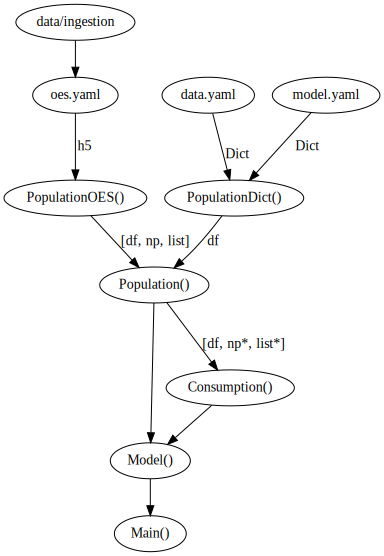

In [4]:
display(dag)

The biggest problem we have right now is that we decide whether to call `PopulationOES()` vs. `PopulationDict()` by passing a `type` parameter from the command line, but the `Consumption()` class doesn't know this type. With test data the mapping between population and protection levels has to be dynamically calculated and passed as a tuple of `np.ndarray` and `list` but `PopulationDict()` doesn't pass these parameters. For now I've hacked PopulationDict() so that it works, but upon some more significant redesigning I'm sure a more elegant solution exists.